In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.metrics as sk

from pylab import rcParams
from statsmodels.tsa.stattools import adfuller

In [141]:
#Reading test file
dataset = pd.read_excel ('training.xlsx', index_col='Date')

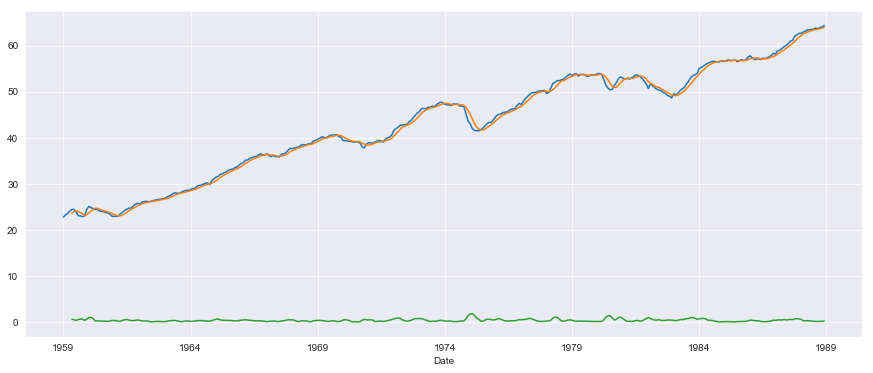

In [142]:
#Plot of rolling statistics
#rolling mean
n=5
rolling_mean = dataset['Value'].rolling(n).mean()
dataset['Rolling_Mean'] = rolling_mean
# rolling std
rolling_std = dataset['Value'].rolling(n).std()
dataset['Rolling_Std'] = rolling_std

dataset.Value.plot(figsize=(15, 6))
dataset.Rolling_Mean.plot(figsize=(15, 6))
dataset.Rolling_Std.plot(figsize=(15, 6))

In [143]:
#Fuller test
val=dataset.Value
test = sm.tsa.adfuller(val)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('Ряд не стационарен, т.к. есть единичные корни')
else:
    print ('Ряд стационарен, т.к. нет единичных корней')

adf:  -0.2533911799284588
p-value:  0.9318510422993471
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Ряд не стационарен, т.к. есть единичные корни


Оценка: Тест Дики-Фулера говорит нам о том, что ряд не стационарен, это также видно и на графике, т.к. у ряда есть тренд.

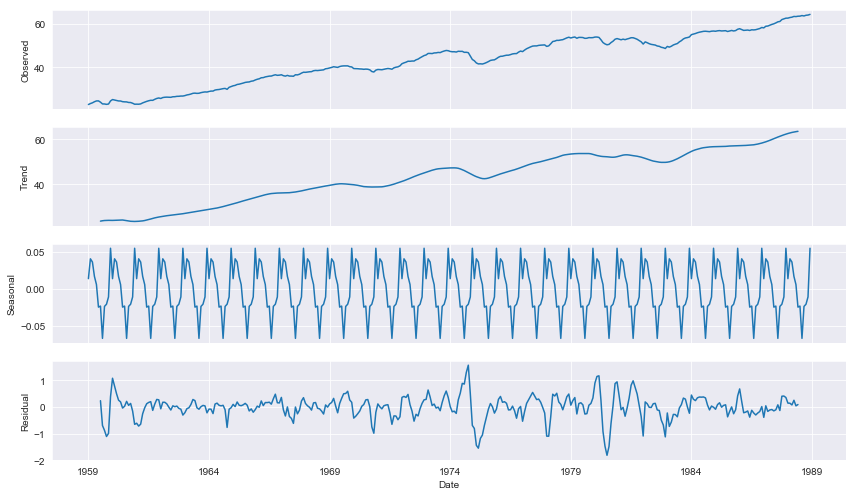

In [144]:
#Additive model
rcParams['figure.figsize'] = 12, 7
rslt = sm.tsa.seasonal_decompose(val, model='additive').plot()

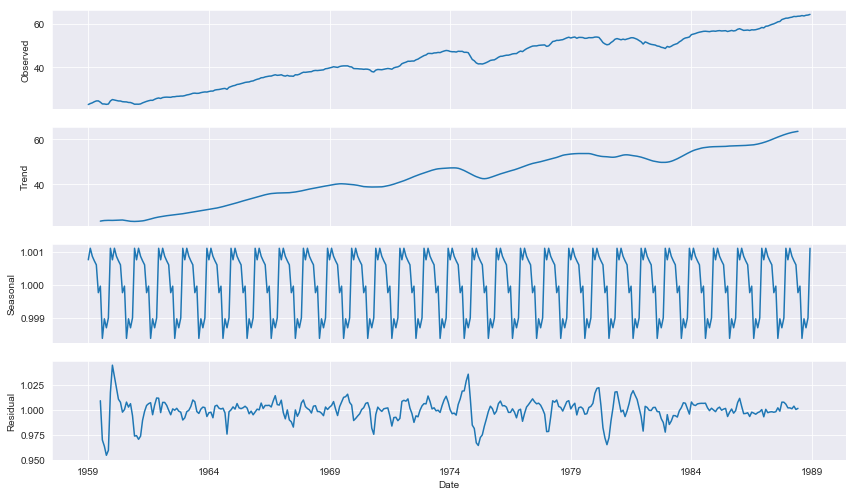

In [145]:
#Multiplicative model
rslt = sm.tsa.seasonal_decompose(val, model='multiplicative').plot()

In [146]:

valdiff = val.diff(periods=1).dropna()
test = sm.tsa.adfuller(valdiff)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('Ряд не стационарен, т.к. есть едининые корни')
else:
    print ('Ряд стационарен, т.к. нет единичных корней')

adf:  -7.367311495211981
p-value:  9.164149561098284e-11
Critical values:  {'1%': -3.4489583388155194, '5%': -2.869739378430086, '10%': -2.5711381780459}
Ряд стационарен, т.к. нет единичных корней


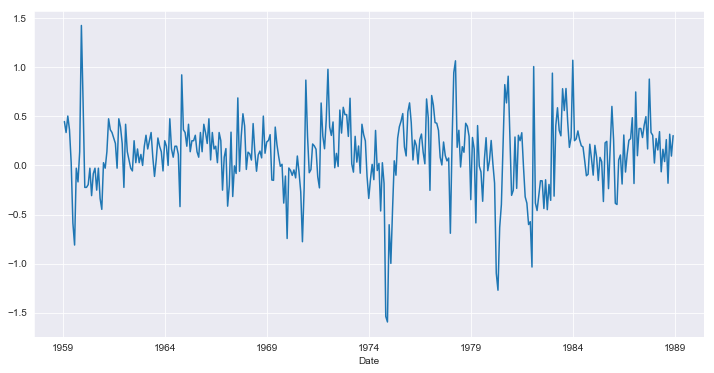

In [147]:
valdiff.plot(figsize=(12,6))

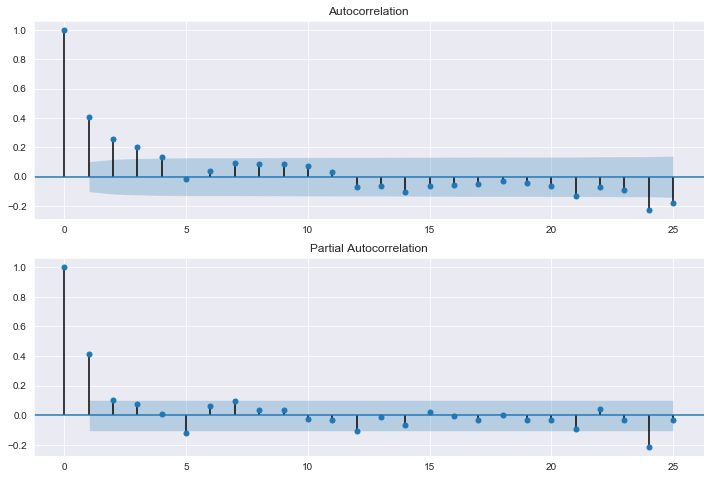

In [148]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(valdiff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(valdiff, lags=25, ax=ax2)

In [122]:
%%time
# ARIMA p = 25, q = 3
mdl1 = sm.tsa.ARIMA(val.squeeze(), order=(25, 1, 3),).fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


CPU times: user 19min 49s, sys: 1min 11s, total: 21min 1s
Wall time: 11min 45s


In [123]:
%%time
# ARIMA p = 1, q = 4
mdl2 = sm.tsa.ARIMA(val.squeeze(), order=(12, 1, 3),).fit()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


CPU times: user 1min 24s, sys: 7.7 s, total: 1min 31s
Wall time: 53 s


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [124]:
%%time
# ARIMA p = 12, q = 3
mdl3 = sm.tsa.ARIMA(val.squeeze(), order=(1, 1, 3),).fit()


CPU times: user 251 ms, sys: 26 ms, total: 277 ms
Wall time: 184 ms


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


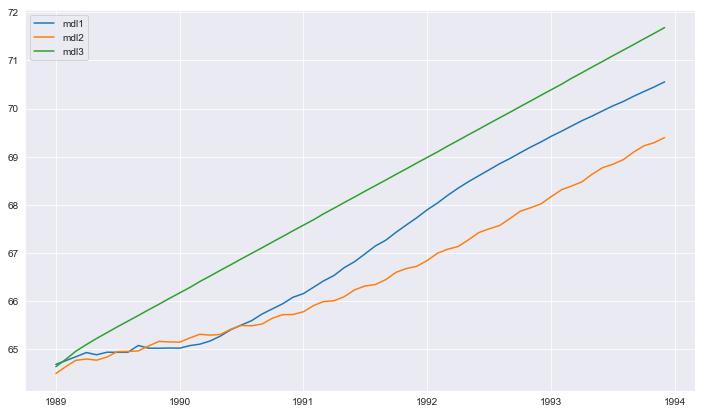

In [149]:
pred1 = mdl1.predict(start='1989-01-01', end='1993-12-01', typ='levels')
pred2 = mdl2.predict(start='1989-01-01', end='1993-12-01', typ='levels')
pred3 = mdl3.predict(start='1989-01-01', end='1993-12-01', typ='levels')
plt.plot(pred1, label='mdl1')
plt.plot(pred2, label='mdl2')
plt.plot(pred3, label='mdl3')
plt.legend(loc='best')

In [150]:
dataset_2 = pd.read_excel("testing.xlsx", index_col=0)
dataset_2.tail()

,Value
Date,
1993-08-01,67.5985
1993-09-01,67.9241
1993-10-01,68.4390
1993-11-01,68.7289
1993-12-01,69.0884


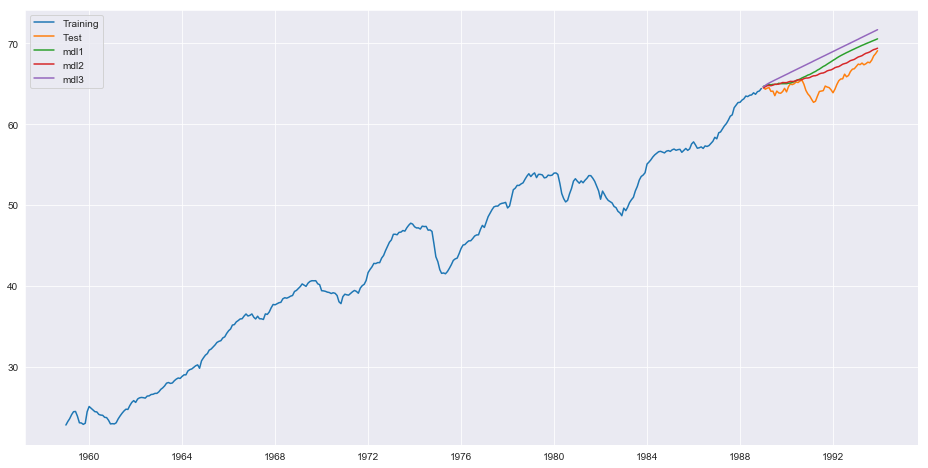

In [151]:
val2=dataset_2
plt.figure(figsize=(16, 8))
plt.plot(val, label='Training')
plt.plot(val2, label='Test')
plt.plot(pred1, label='mdl1')
plt.plot(pred2, label='mdl2')
plt.plot(pred3, label='mdl3')
plt.legend(loc='best')
plt.show()

In [152]:
r21 = sk.r2_score(val2, pred1)
r22 = sk.r2_score(val2, pred2)
r23 = sk.r2_score(val2, pred3)
print('r2 mdl1:', r21)
print('r2 mdl2:', r22)
print('r2 mdl3:', r23)

r2 mdl1: -1.0816363709585208
r2 mdl2: 0.008130572857929619
r2 mdl3: -3.3206742844946566


In [153]:
ak1 = mdl1.aic
ak2 = mdl2.aic
ak3 = mdl3.aic
print('AIC mdl1:', ak1)
print('AIC mdl2:', ak2)
print('AIC mdl3:', ak3)

AIC mdl1: 261.6016102361036
AIC mdl2: 248.80204039814316
AIC mdl3: 251.08321143936257
